In [2]:
import csv
import numpy as np
import pandas as pd
import networkx as nx
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file
# from pymnetModel import MarkovModel

<ipython-input-1-1466ee1a5d5a>:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


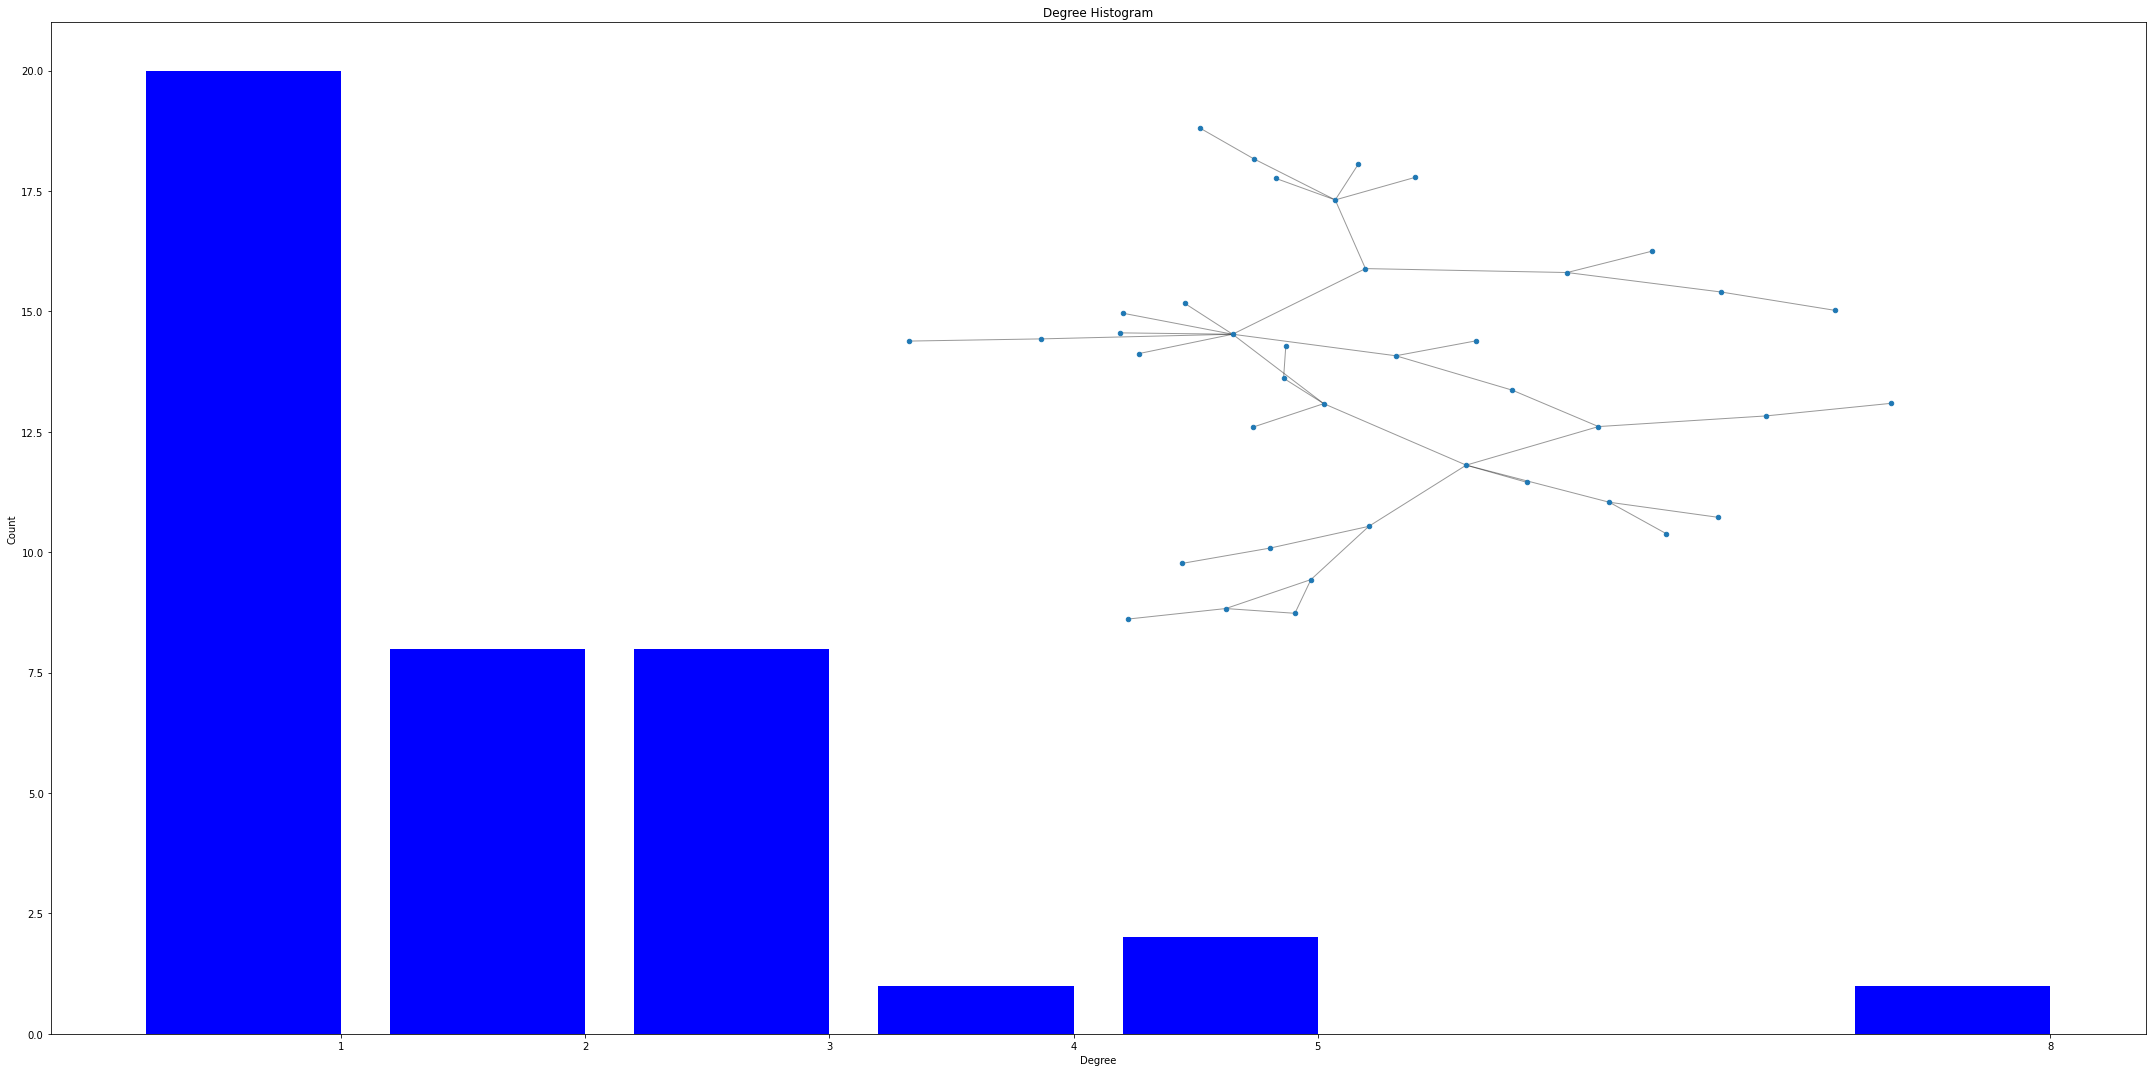

In [1]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file

G = from_file("hiv")

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(30,15))
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.tight_layout()
#plt.savefig("plots/networks/barabassi1000Network2.pdf")

In [67]:
import networkx as nx
import EoN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dictonaryModel import random_edge, MarkovModel, multiplex_network, from_file

reasult = {"nodes": [], "network": [], 'gamma': [], 'tau': [], 'infected': [], 'sustainable': []}
for network in [100, 1000, 'hiv', 'infectious', 'school']:
    if type(network) == str:
        physical_layer = from_file(network)
    else:
        physical_layer = nx.barabasi_albert_graph(network, 16)
    nodes_number = len(physical_layer.nodes())
    for gamma in np.round(np.linspace(0.1, 1, 10), 2):
        for tau in np.round(np.linspace(0, 1, 11), 2):
            t, S, I = EoN.Gillespie_SIS(physical_layer, tau, gamma, tmax = 10,
                                        initial_infecteds = range(20))
            if type(network) == int:
                reasult['network'].append(f"barabassi{str(network)}")
            else:
                reasult['network'].append(network)
            reasult['nodes'].append(nodes_number)
            reasult['gamma'].append(gamma)
            reasult['tau'].append(tau)
            reasult['infected'].append(np.round(I[-1]/nodes_number, 2))
            reasult['sustainable'].append(S[-1])

df = pd.DataFrame(data=reasult)
df_hiv = df.loc[(df['nodes'] == 40)]
df_school = df.loc[(df['nodes'] == 70)]
df_infectious = df.loc[(df['nodes'] == 410)]
df_houndred = df.loc[(df['nodes'] == 100)]
df_thousand = df.loc[(df['nodes'] == 1000)]
infected_pivot_houndred = df_houndred.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_thousand = df_thousand.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_hiv = df_hiv.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_school = df_school.pivot(columns='tau', index='gamma', values='infected')
infected_pivot_infectious = df_infectious.pivot(columns='tau', index='gamma', values='infected')

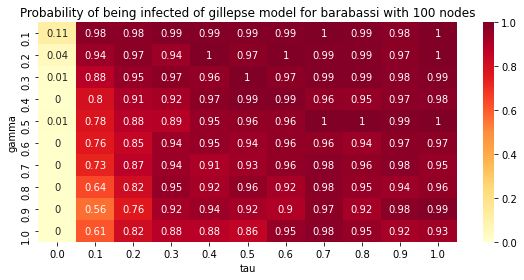

In [68]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_houndred, annot=True, vmax=infected_pivot_houndred.max().max(), vmin=infected_pivot_houndred.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for barabassi with 100 nodes')
plt.tight_layout()
plt.savefig("plots/gillepse/barabassi100.pdf")

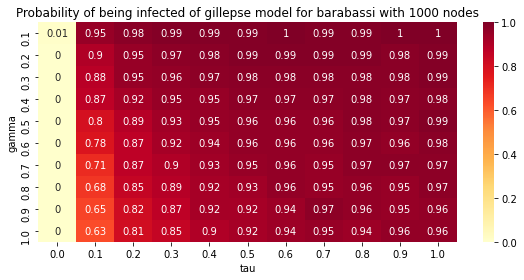

In [69]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_thousand, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for barabassi with 1000 nodes')
plt.tight_layout()
plt.savefig("plots/gillepse/barabassi1000.pdf")

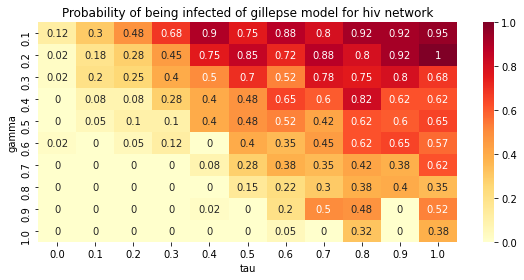

In [70]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_hiv, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for hiv network')
plt.tight_layout()
plt.savefig("plots/gillepse/hiv.pdf")

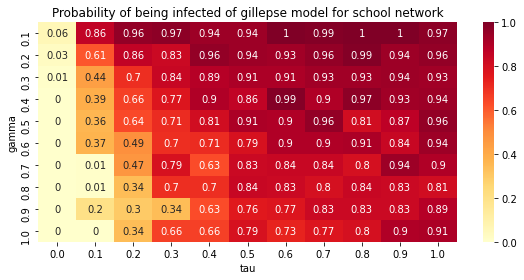

In [71]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_school, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for school network')
plt.tight_layout()
plt.savefig("plots/gillepse/school.pdf")

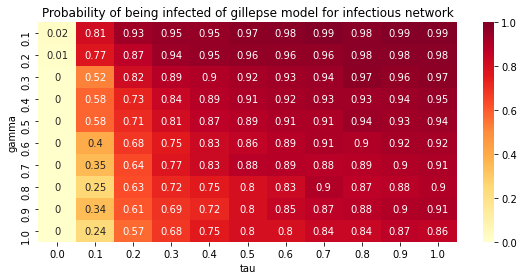

In [72]:
plt.figure(figsize=(8, 4))
ax = plt.axes()
sns.heatmap(infected_pivot_infectious, annot=True, vmax=infected_pivot_thousand.max().max(), vmin=infected_pivot_thousand.min().min(), cmap="YlOrRd", ax = ax)
ax.set_title('Probability of being infected of gillepse model for infectious network')
plt.tight_layout()
plt.savefig("plots/gillepse/infectious.pdf")